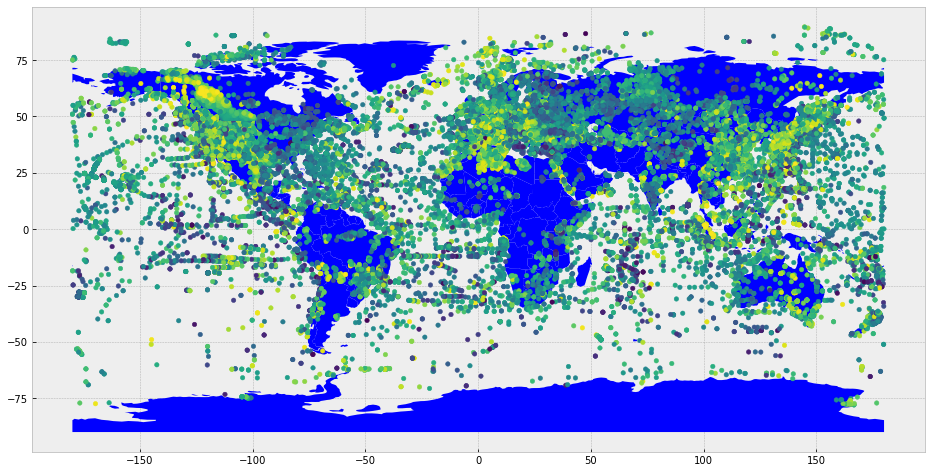

In [8]:
import os
import sys
import geopandas as gpd
import numpy as np
import pandas as pd
import sys
from shapely import geometry
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
plt.style.use('bmh')

loaded = gpd.read_file(os.path.join(os.getcwd(), 'data', 'heatflow.geojson'))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoDataFrame(loaded, geometry=gpd.points_from_xy(loaded.lng, loaded.lat))
fig, ax = plt.subplots(1, 1, figsize=(16, 13))
world.plot(ax=ax)
gdf.plot(ax=ax, column='q', s=20)
ax.set_axisbelow(True)
plt.show()

(56703, 4)

In [48]:
from shapely.geometry import Polygon 
from itertools import product
import utm

x_vals = list(np.linspace(-180, 180, 360))
y_vals = list(np.linspace(-80, 80, 160))

geoms = [
    Polygon([[lower_x, lower_y],
             [lower_x, upper_y],
             [upper_x, upper_y],
             [upper_x, lower_y],
             ]) 
    for (lower_x, upper_x), (lower_y, upper_y) in 
    product(
        zip(x_vals[:-1], x_vals[1:]),
        zip(y_vals[:-1], y_vals[1:]))]

grid = gpd.GeoDataFrame({'geometry': geoms})

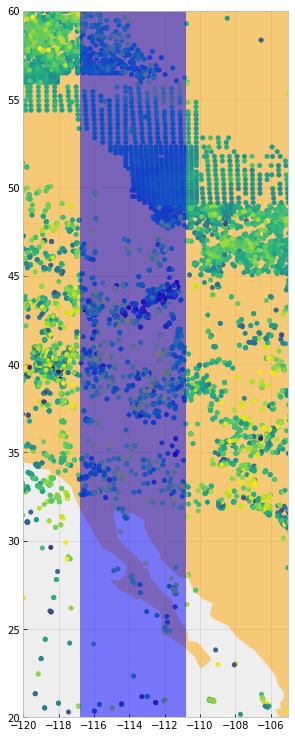

In [20]:
test = grid.iloc[10000:11000]
fig, ax = plt.subplots(1, 1, figsize=(16, 13))

world.plot(ax=ax, color='orange', alpha=0.5)
gdf.plot(ax=ax, column='q', s=20)
test.plot(ax=ax, alpha=0.5)

ax.set_axisbelow(True)
ax.set_xlim(-120, -105)
ax.set_ylim(20, 60)
plt.show()

In [23]:
from shapely.geometry import Polygon, Point

boundary = Polygon([[-120, 20], [-120, 60], [-105, 60], [-105, 20]])

mask = loaded.apply(lambda row: boundary.contains(Point([float(row.lng), float(row.lat)])), axis=1)
subset = loaded.loc[mask]

c:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


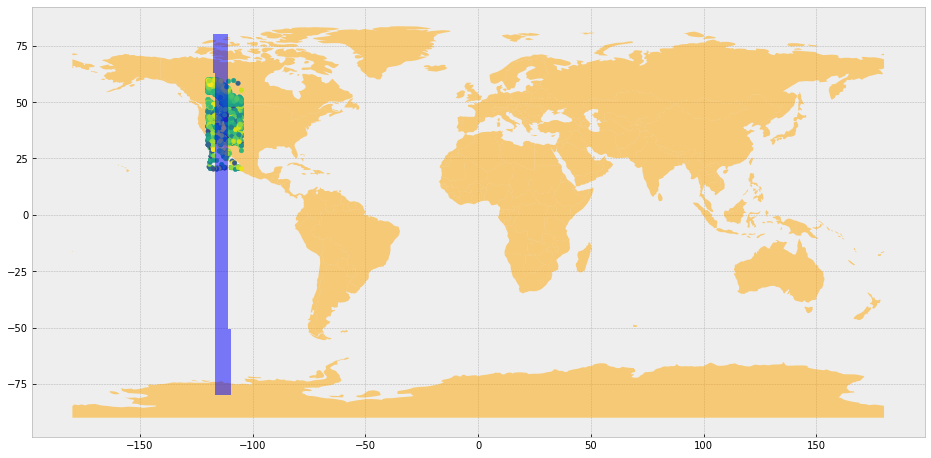

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 13))

world.plot(ax=ax, color='orange', alpha=0.5)
subset.plot(ax=ax, column='q', s=20)
test.plot(ax=ax, alpha=0.5)

ax.set_axisbelow(True)
# ax.set_xlim(-120, -105)
# ax.set_ylim(20, 60)
plt.show()

c:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


          q      lat                lng                     geometry  \
39014  10.0  35.2167            32.9333    POINT (32.93330 35.21670)   
36401  56.0  57.6000             -117.2  POINT (-117.20000 57.60000)   
48634  30.0  54.2500  85.83329999999999    POINT (85.83330 54.25000)   
14662  68.0  42.6217             -113.5  POINT (-113.50000 42.62170)   
28666  36.0  44.3060            33.0048    POINT (33.00480 44.30600)   

                   x             y  
39014  493929.603897  3.897077e+06  
36401  488046.631976  6.384196e+06  
48634  423983.966414  6.011966e+06  
14662  294977.979984  4.721836e+06  
28666  500382.852340  4.905861e+06  


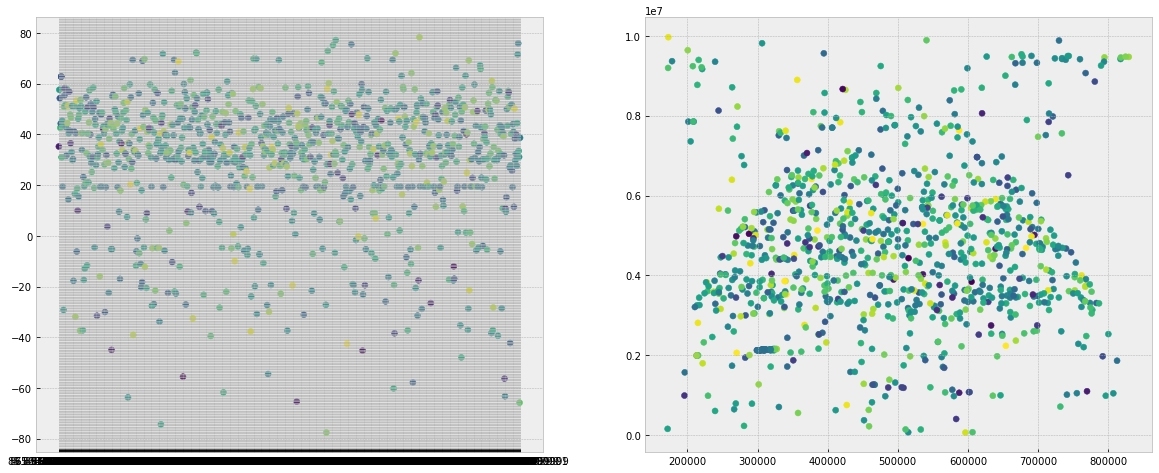

In [57]:
import pyproj as proj

crs_wgs = proj.Proj(init='epsg:4326')
crs_bng = proj.Proj(init='epsg:27700')

def transform_coords(lon, lat):
    # return proj.transform(crs_wgs, crs_bng, lon, lat)
    x, y, zone, ut = utm.from_latlon(row.lng, row.lat)
    return x, y

n = 1000
# subsubset = subset.iloc[:n]
subsubset = loaded.sample(n)

# new = subsubset.apply(lambda row: proj.transform(crs_wgs, crs_bng, row.lng, row.lat), axis=1).to_numpy()

subsubset[['x', 'y']] = np.zeros((n, 2))
for i, row in subsubset.iterrows():
    x, y, zone, ut = utm.from_latlon(float(row.lat), float(row.lng))
    subsubset.at[i, 'x'] = x
    subsubset.at[i, 'y'] = y

# new = subsubset.apply(lambda row: transform_coords(row.lng, row.lat), axis=1)
# print(new)

# x = pd.Series([val[0] for val in new], index=subsubset.index)
# y = pd.Series([val[1] for val in new], index=subsubset.index)

# subsubset['x'] = x
# subsubset['y'] = y

print(subsubset.head())

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].scatter(subsubset['lng'].to_numpy(), subsubset['lat'].to_numpy(), c=subsubset['q'].to_numpy())
axs[1].scatter(subsubset['x'].to_numpy(), subsubset['y'].to_numpy(), c=subsubset['q'].to_numpy())

plt.show()



In [3]:
import os
import sys
from get_heatflow import get_heatflow

get_heatflow((-1.761873755588998, 54.9503096017342))

92.0

In [126]:
joined = grid.sjoin(gdf)

In [127]:
grid['q'] = np.ones(len(grid)) * (-1)

for i in range(len(grid)):

    grid.loc[i, 'q'] = joined.loc[joined['index_right'] == i]['q'].mean() 


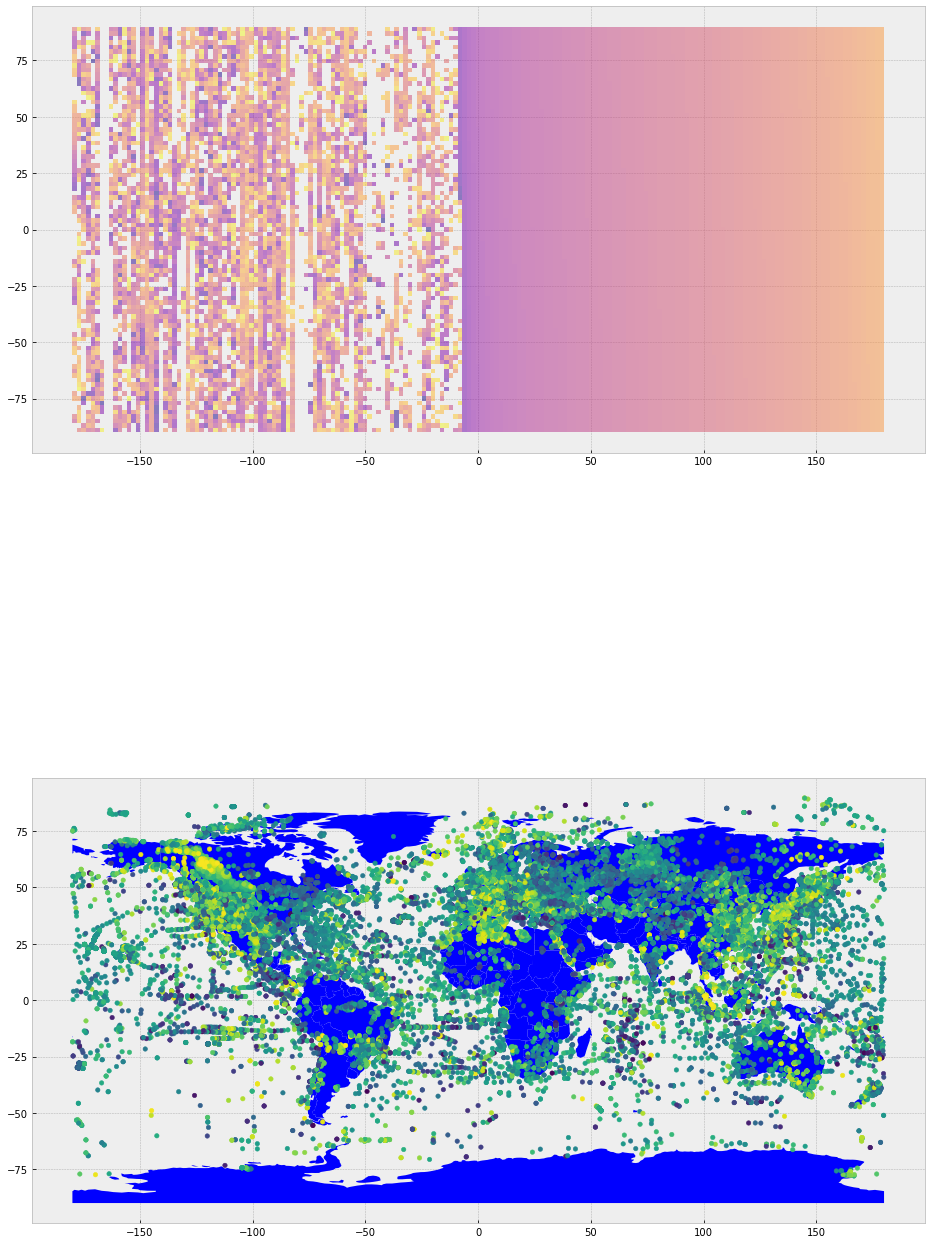

In [128]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
fig, axs = plt.subplots(2, 1, figsize=(16, 26))

grid.dropna().plot(ax=axs[0], column='q', alpha=0.5, cmap='plasma')

world.plot(ax=axs[1])
gdf.plot(ax=axs[1], column='q', s=20)

axs[0].set_axisbelow(True)
axs[1].set_axisbelow(True)
plt.show()



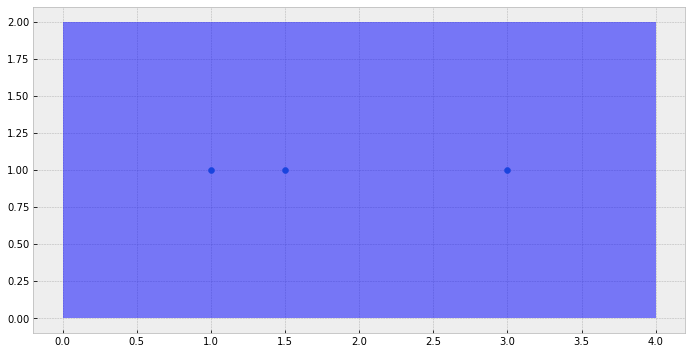

                                            geometry  values
0  POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....    -1.0
1  POLYGON ((2.00000 0.00000, 2.00000 2.00000, 4....    -1.0
   values                 geometry  index_right
0       1  POINT (1.00000 1.00000)            0
1       2  POINT (1.50000 1.00000)            0
2       4  POINT (3.00000 1.00000)            1


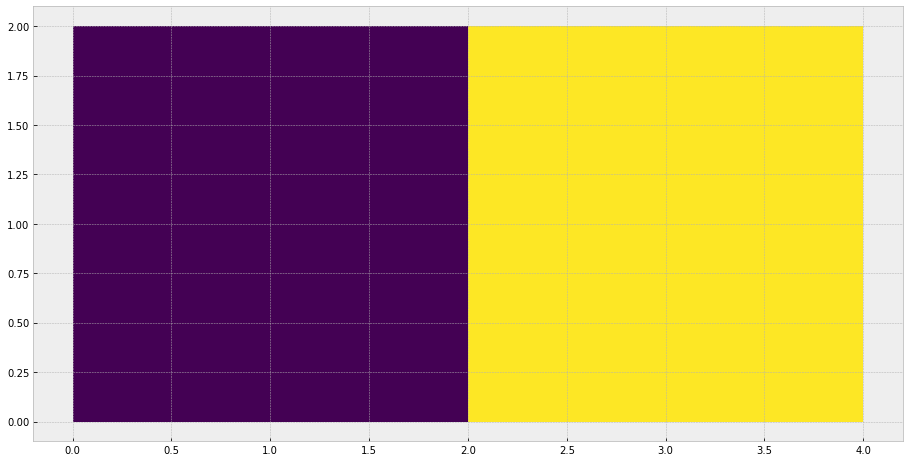

In [129]:
import rtree
from shapely.geometry import Point, Polygon

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

a = gpd.GeoDataFrame({
    'values': [1, 2, 4],
    'geometry': [
        Point([1., 1.]), 
        Point([1.5, 1.]),
        Point([3., 1.]) 
    ]}
)     

b = gpd.GeoDataFrame({
    'geometry': [
        Polygon([[0., 0.], [2., 0.], [2, 2], [0, 2]]), 
        Polygon([[2., 0.], [2., 2.], [4, 2], [4, 0]]), 
    ]}
)     
     
a.plot(ax=ax)
b.plot(ax=ax, alpha=0.5)

ax.set_axisbelow(True)
plt.show() 
    
# joined = b.sjoin(a)
joined = a.sjoin(b)

b['values'] = np.ones(len(b)) * (-1)

print(b.head())
print(joined.head())

for i in range(len(b)):

    b.loc[i, 'values'] = joined.loc[joined['index_right'] == i]['values'].mean() 




#joined['geometry'].value_counts()
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

b.plot(ax=ax, column='values')

plt.show()


